In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


In [4]:
# Import dataset
drill_data = pd.read_csv('test.csv')

# Data Exploration
drill_data

drill_data = pd.get_dummies(drill_data, columns=['Rig', 'Shift'])
drill_data



,Depth_From,Depth_To,dip,Azimuth,Time(mins),Penetration Rate,Rig_M3-BH29,Rig_M3-BH30,Shift_Day,Shift_Night
0,0.0,4.2,65.0,120.0,18.0,14.000000,1,0,0,1
1,4.2,8.3,65.0,120.0,16.0,15.375000,1,0,0,1
2,8.3,12.0,65.0,120.0,17.0,13.058824,1,0,0,1
3,12.0,16.8,65.0,120.0,16.0,18.000000,1,0,0,1
4,16.8,21.0,65.0,120.0,16.0,15.750000,1,0,0,1
5,21.0,25.1,65.0,120.0,18.0,13.666667,1,0,0,1
6,25.1,29.4,65.0,120.0,16.5,15.636364,1,0,0,1
7,29.4,33.6,65.0,120.0,19.1,13.193717,1,0,0,1
8,33.6,39.5,65.0,120.0,18.5,19.135135,1,0,0,1
9,39.5,42.0,65.0,120.0,17.8,8.426966,1,0,0,1


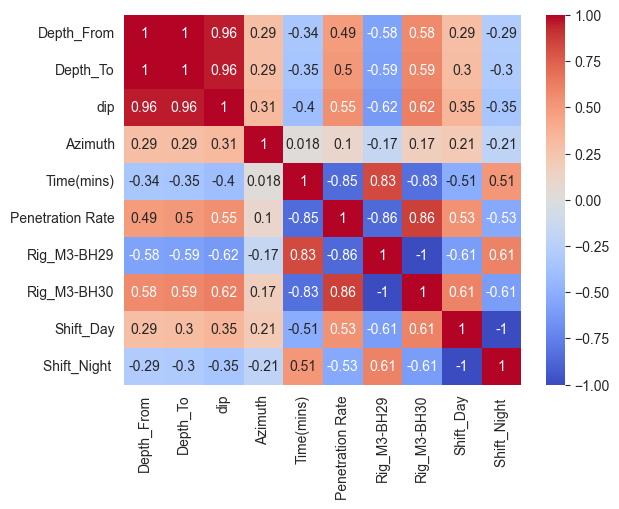

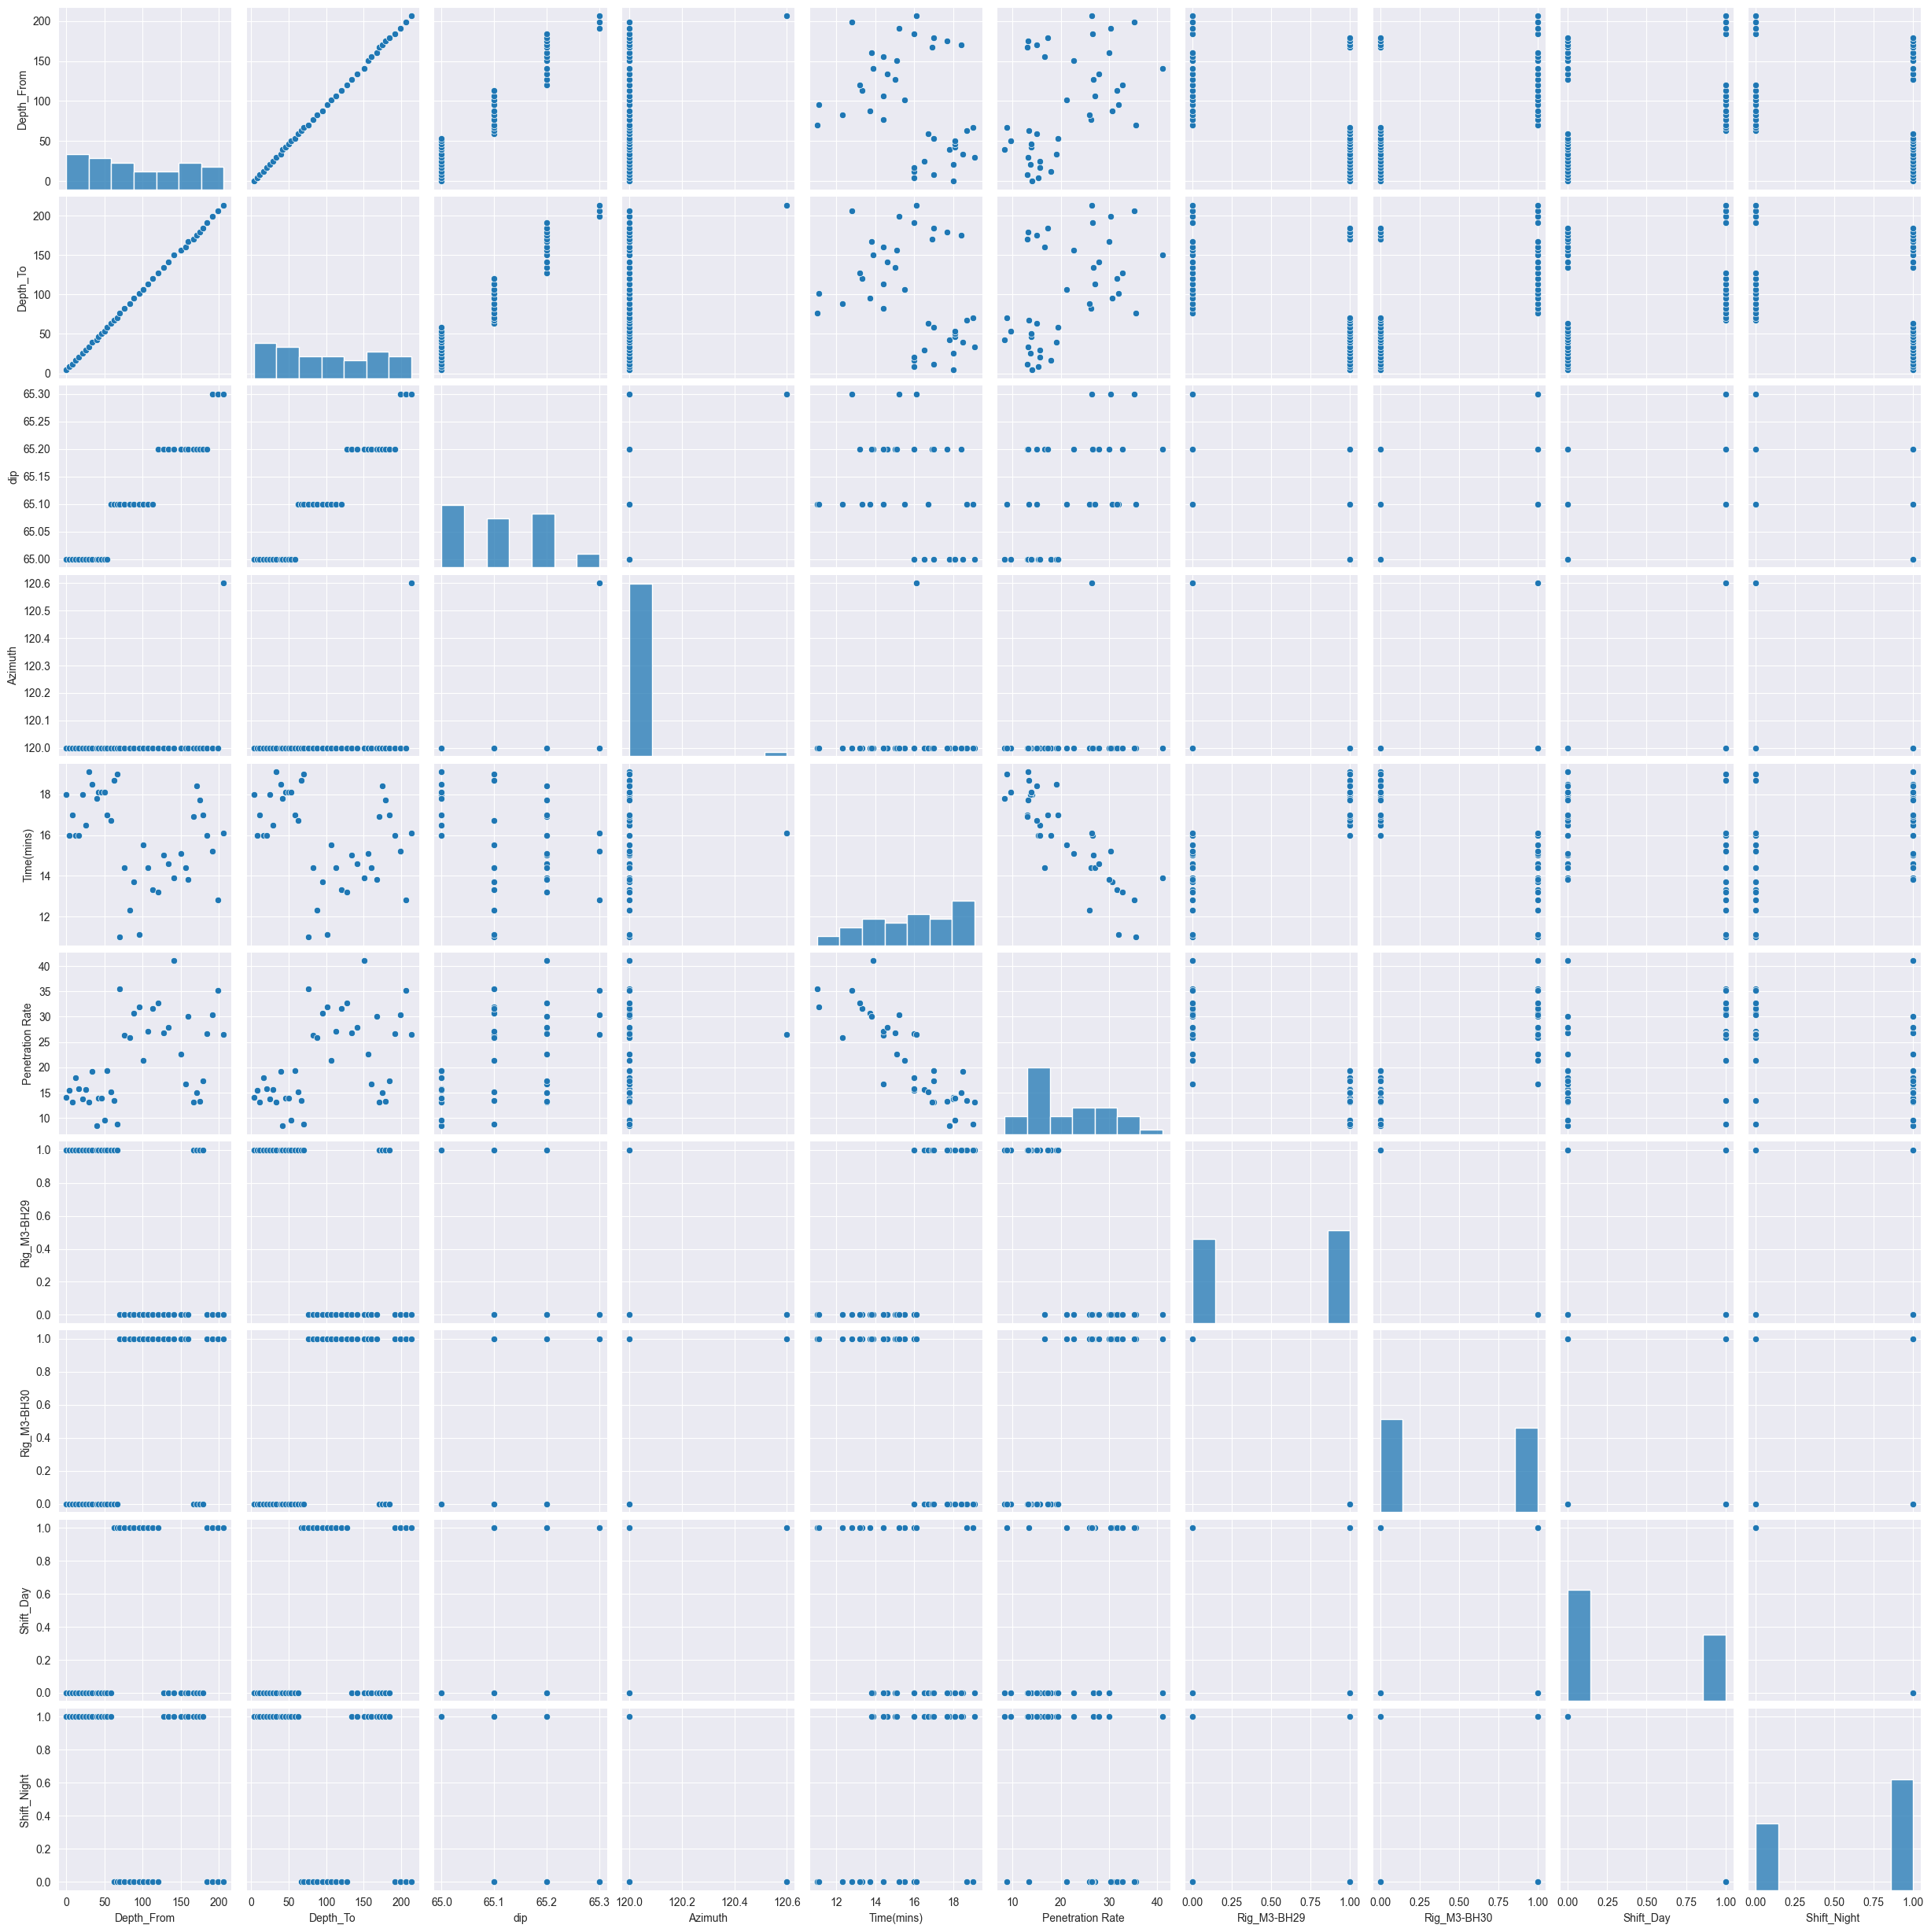

In [5]:
# Exploratory data analysis: correlation and heatmap
correlation = drill_data.corr()
sns.heatmap(correlation,annot=True,cmap='cool-warm')

# Exploratory data analysis: pair plot
sns.pairplot(drill_data)


In [6]:
# Convert non-numeric data using one-hot encoding
correlation = drill_data.corr()
correlation

,Depth_From,Depth_To,dip,Azimuth,Time(mins),Penetration Rate,Rig_M3-BH29,Rig_M3-BH30,Shift_Day,Shift_Night
Depth_From,1.000000,0.999779,0.955266,0.289608,-0.337452,0.486734,-0.575955,0.575955,0.293148,-0.293148
Depth_To,0.999779,1.000000,0.956947,0.290209,-0.349477,0.503766,-0.588015,0.588015,0.300383,-0.300383
dip,0.955266,0.956947,1.000000,0.313803,-0.402039,0.550826,-0.624791,0.624791,0.346205,-0.346205
Azimuth,0.289608,0.290209,0.313803,1.000000,0.017919,0.101393,-0.168345,0.168345,0.206725,-0.206725
Time(mins),-0.337452,-0.349477,-0.402039,0.017919,1.000000,-0.852433,0.829577,-0.829577,-0.510442,0.510442
Penetration Rate,0.486734,0.503766,0.550826,0.101393,-0.852433,1.000000,-0.863118,0.863118,0.532567,-0.532567
Rig_M3-BH29,-0.575955,-0.588015,-0.624791,-0.168345,0.829577,-0.863118,1.000000,-1.000000,-0.607527,0.607527
Rig_M3-BH30,0.575955,0.588015,0.624791,0.168345,-0.829577,0.863118,-1.000000,1.000000,0.607527,-0.607527
Shift_Day,0.293148,0.300383,0.346205,0.206725,-0.510442,0.532567,-0.607527,0.607527,1.000000,-1.000000
Shift_Night,-0.293148,-0.300383,-0.346205,-0.206725,0.510442,-0.532567,0.607527,-0.607527,-1.000000,1.000000


In [37]:
X = drill_data.drop('Depth_To',axis=1)
y = drill_data['Depth_To']

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle=True)

# Assign algorithm
model = LinearRegression()

# Link algorithm to X and y variables
model.fit(X_train, y_train)

#Find y-intercept
model.intercept_

# # Find x coefficients
# model.coef_

44.40716820553136

In [73]:
# Data point to predict
drill = [
	40, #Depth_From
	65, #Dip
	120, #Azimuth
	16, #Time(mins)
	22, #Penetration Rate
	0, #Rig_M3-BH29
	1, #Rig_M3-BH30
	1, #Shift_Day
	1, #Shift_Night
]

# Make prediction
drill = model.predict([drill])
drill

C:\Users\nana\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.77509504])

ValueError: x and y must be the same size

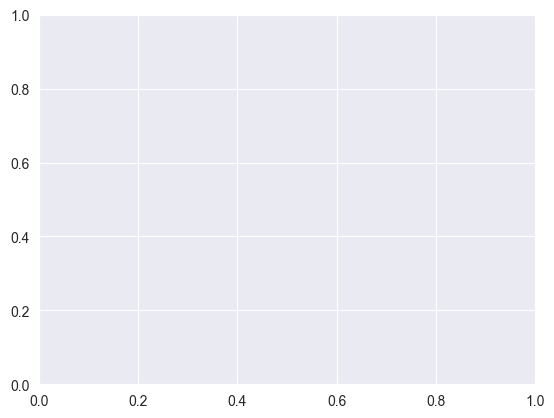

In [57]:
plt.scatter(y_test, drill)
plt.figure(figsize=(15/10))
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Hol Depth Prediction')
plt.xlabel('Penetration_Rate')
plt.ylabel('Depth_To')
plt.show()

In [134]:
#Target Values
target_depth = 300.0
target_dip = 65.0
target_azimuth = 120.0
av_penetration_rate = 25.0
drilling_rate = 22.0
Y='Yes'
N='No'

intro = input("Are you ready to input today's values?\nYes/No: ")
if intro.title()==Y:
    depth = input("Depth: ")
    dip = input("Dip: ")
    azimuth = input("Azimuth: ")
    penetration = input('Penetration: ')


    diff_depth=target_depth-float(depth)
    diff_dip=target_dip-float(dip)
    diff_azimuth=target_azimuth-float(azimuth)
    diff_penetration=av_penetration_rate-float(penetration)

    dip_allowance=range(1,21)
    azimuth_allowance=range(1,51)

    if diff_depth>0.0:
        print(f'{diff_depth} meters left to be drilled')
    elif diff_depth==0.0:
        print('Depth target reached')
    else:
        print(f'Drill depth exceeded by {abs(diff_depth)} meters' )
    
    
    if int(abs(diff_dip)*100) in dip_allowance:
            print(f'{abs(diff_dip)} dip differnce. You are on track.')
    elif int(diff_dip*100)>dip_allowance[-1]:
            print(f'DEVIATION FROM DIP TARGET: \n\tYou have deviated {abs(diff_dip)} less than the target. If feasible, correct the dip and keep on track.')
    elif int(diff_dip*100) < -abs(dip_allowance[-1]):
            print(f'DEVIATION FROM DIP TARGET: \n\tYou have deviated {abs(diff_dip)} above the target. If feasible, correct the dip and keep on track')       
    else :
            print("Dip target achieved") 

    if int(abs(diff_azimuth)*100) in azimuth_allowance:
         print(f'{abs(diff_azimuth)} azimuth difference. You are on track.')
    elif int(diff_azimuth*100)>azimuth_allowance[-1]:
        print(f'DEVIATION FROM AZIMUTH TARGET:\n\tYou have deviated {abs(diff_azimuth)} less than the target. If feasible, correct the azimuth and keep on track.')
    elif int(diff_azimuth*100)<-abs(azimuth_allowance[-1]):
        print(f'DEVIATION FROM AZIMUTH TARGET:\n\tYou have deviated {abs(diff_azimuth)} above the target. If feasible, correct the azimuth and keep on track')
    else:
        print("Azimuth target achieved")

    if diff_penetration>0.0:
        print(f'increase your penetration by {diff_penetration} m/h')
    elif diff_penetration==0.0:
        print('penetration rate achieved')
    else:
        print(f"you're doing a great job with the penetration rate")
elif intro.title()==N:
    "break"
else :
    print('Oops! please type Yes or No')


70.0 meters left to be drilled
DEVIATION FROM DIP TARGET: 
	You have deviated 1.0 above the target. If feasible, correct the dip and keep on track
DEVIATION FROM AZIMUTH TARGET:
	You have deviated 2.0 above the target. If feasible, correct the azimuth and keep on track
increase your penetration by 3.0 m/h
